In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Построим линейную регрессию от отдного параметра, наиболее сильно коррелирующего с ценами - LSTAT (уровень социального статуса населения в данном районе), корреляция с ценой на дом составляет -0.74.

Сперва разделим отсортируем все значения по LSTAT параметру 

In [4]:
data.sort_values(by=['LSTAT'], inplace=True)

X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
medv = data[['MEDV']]

Сперва разделим датасет на тренировочные и тестовые данные (80% на 20%)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    medv,
    test_size = 0.2,
    random_state = 42
)

Из полученных тренировочных и тестовых данных мы используем только один атрибут - LSTAT

In [6]:
X_train_lstat = X_train[['LSTAT']]
X_test_lstat = X_test[['LSTAT']]

Сделаем reshape(-1, 1) как того требует модель

In [7]:
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

Подгрузим модель 

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Обучим модель

In [9]:
model.fit(X_train_lstat, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим ошибку модели

In [10]:
model.score(X_test_lstat, y_test)

0.6639674323040221

Всего 66% верно предсказанных

Построим рисунок

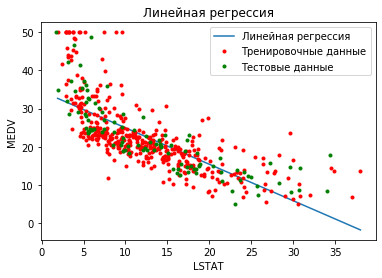

In [11]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

А теперь попробуем полиномиальную регрессию

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.7672027582033504

Полиномиальная регрессия степени 2 на 10% лучше

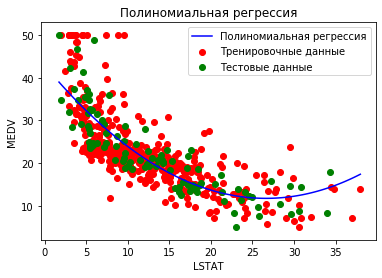

In [13]:
def viz_polymonial():
    plt.scatter(X_train_lstat, y_train, c='red')
    plt.scatter(X_test_lstat, y_test, c='green')
    x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

А если возьмем степень 4?

In [14]:
poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.7512290128069695

Еще на 10% лучше

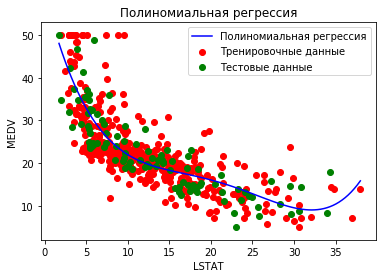

In [15]:
viz_polymonial()

# Линейная регрессия от нескольких переменных

Допустим, мы решили, что хотим построить регрессию от всех значений. Берем таблицу и используем все колонки в качестве тренировочных данных

In [16]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666.0,20.2,9.32,26.45
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16
363,4.22239,0.0,18.10,1,0.770,5.803,89.0,1.9047,24,666.0,20.2,353.04,14.64
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53


In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

Построим модель линейной регрессии на всех атрибутах

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7849686138338864

на 3% лучше, чем предыдущая линейная регрессия (от одной переменной)

Построим полиномиальную модель в зависимости от всех атрибутов

In [19]:
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.8920399674822721

89% - это круто. Но возможно, это переобучение. Как проверить? **Кросс-валидация.** Более подробно можно почитать здесь - https://neerc.ifmo.ru/wiki/index.php?title=Кросс-валидация.

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X,
    medv,
    test_size = 0.2,
    random_state = 10
)

In [21]:
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_2 = np.array(y_train_2)
y_test_2 = np.array(y_test_2)

In [22]:
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_2)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train_2)

pol_reg.score(poly_reg.fit_transform(X_test_2), y_test_2)

0.6889334759706145

Ну что ж, можно заметить, что во второй раз результат гораздо менее вдохновляющий => **переобучение модели** из-за сложности полинома

In [23]:
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

-163.64495211507304

Действительно, чем сложнее полином, тем хуже работает модель!

Значит, иногда сложность модели не гарантирует нам нужный результат!

# Логистическая регрессия

Загрузим новый датасет, для предсказания болезни человека (сердечная болезнь) - https://www.kaggle.com/ronitf/heart-disease-uci. 


**Колонки:**
> 1. **age**
> 2. **sex** 
> 3. **cp** chest pain type (4 values) 
> 4. **trestbps** resting blood pressure 
> 5. **chol** serum cholestoral in mg/dl 
> 6. **fbs** fasting blood sugar > 120 mg/dl
> 7. **restecg** resting electrocardiographic results (values 0,1,2)
> 8. **thalach** maximum heart rate achieved 
> 9. **exang** exercise induced angina 
> 10. **oldpeak** = ST depression induced by exercise relative to rest.
A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
> 11. the **slope** of the peak exercise ST segment 
> 12. **ca** number of major vessels (0-3) colored by flourosopy 
> 13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. **target** - ill or not => target == 0 means that there is significant heart disease. A 1 means that there is not.


In [24]:
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Количество собранных показаний пациентов

In [25]:
len(data)

303

Ну что ж, у нас есть пациенты, которые болеют сердечной болезнью (0) и не болеют (1). Задача **классификации**

Разделим таблицу на предсказываемые и независимые данные

In [26]:
X = data.drop('target', axis=1)
y = data.target

**Логистическая регрессия** - это разновидность множественной регрессии, общее назначение которой состоит в анализе связи между несколькими независимыми переменными (называемыми также регрессорами или предикторами) и зависимой переменной. Бинарная логистическая регрессия применяется, если зависимая переменная является бинарной (т.е. может принимать только два значения). Иными словами, с помощью логистической регрессии можно оценивать вероятность того, что событие наступит для конкретного испытуемого (больной/здоровый, возврат кредита/дефолт и т.д.).

Все регрессионные модели могут быть записаны в виде формулы:


$$y=F(x_{1},x_{2},..x_{n})$$

Качество классификационной модели оценивается по таким характеристикам, как **precision** и **recall**. 

Точность (precision) и полнота (recall) являются метриками которые используются при оценке большей части алгоритмов извлечения информации. Иногда они используются сами по себе, иногда в качестве базиса для производных метрик, таких как F-мера или R-Precision.

**Точность системы в пределах класса (precision)** – это доля элементов действительно принадлежащих данному классу относительно всех элементов которые система отнесла к этому классу.

$$precision = \frac{tp}{tp+fp}$$

**Полнота системы (recall)** – это доля найденных классфикатором элементов принадлежащих классу относительно всех элементов этого класса в тестовой выборке.

$$recall = \frac{tp}{tp+fn}$$

**recall** соответственно - это отношение верно предсказанных классов к сумме верных предсказаний и неверных противоположных предсказаний. Recall - вероятность того, что модель найдет всех больных в классе о здоровых и больных людях.

В общем виде это можно проиллюстрировать следующей картинкой:

![alt text](https://hsto.org/webt/cu/4l/2w/cu4l2wliuqbqanpptc1y-rq3scu.png)

В таблице содержится информация сколько раз система приняла верное и сколько раз неверное решение по документам заданного класса. А именно:

*  TP — истино-положительное решение;
*  TN — истино-отрицательное решение;
*  FP — ложно-положительное решение;
*  FN — ложно-отрицательное решение.

In [27]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Обучим логистическую регрессию

In [28]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

Solver - параметр, в котором указывается, как должна обучаться модель

solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not handle no penalty
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

New in version 0.17: Stochastic Average Gradient descent solver.

New in version 0.19: SAGA solver.

Changed in version 0.20: Default will change from ‘liblinear’ to ‘lbfgs’ in 0.22.

In [29]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



Хороший результат получился! Но давайте проверим с помощью кросс-валидации

In [30]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



Аналогичный результат. Что ж, оставим пока как есть.

# Проверка статистических гипотез

Генеральная совокупность - совокупность всех объектов (единиц), относительно которых учёный намерен делать выводы при изучении конкретной проблемы.

Выборка - множество случаев (испытуемых, объектов, событий, образцов), с помощью определённой процедуры выбранных из генеральной совокупности для участия в исследовании.

**Генеральная совокупность** в данном случае - все пациенты. Их количество - 303.

Возьмем две колонки из генеральной совокупности:

**trestbps** - давление в спокойном состоянии

**chol** - уровень холестирина

Построим точечный график этих параметров.

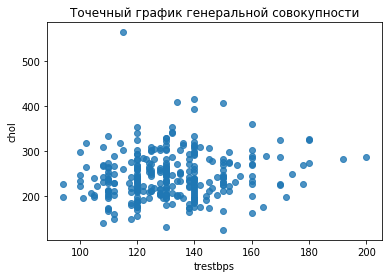

In [32]:
trestbps = data['trestbps']
chol = data['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=False)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Точечный график генеральной совокупности')
plt.show()

Возьмем некую выборку из генеральной совокупности, например, людей, возраст которых меньше 45 лет, и построим точечный график для данной выборки.

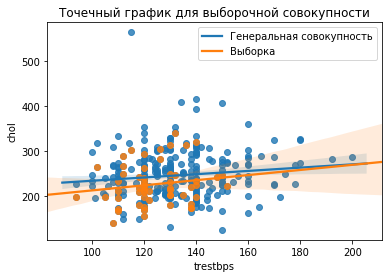

In [33]:
trestbps_small = data[data['age']<45]['trestbps']
chol_small = data[data['age']<45]['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=True)
sns.regplot(x= trestbps_small, y=chol_small,data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

По графику можно заметить, что если мы будем рассматривать выборку людей меньше 45 лет, то статистические формулы о генеральной совокупности будут верны, так как выборка более-менее презентативна.

Проблема в том, **как** выбрать выборку таким образом, что эта анализ этой выборки позволит сделать выводы о генеральной совокупности. 

**Шаги проверки статистических гипотез следующие:**

*   формулируется основная гипотеза H0 и альтернативная гипотеза H1;
*   выбирается статистический критерий, с помощью которого будет проверяться гипотеза;
*   задаётся значение уровня значимости α;
*   находятся границы области принятия гипотезы;
*   делается вывод о принятии или отвержении основной гипотезы H0.

Возьмем выборку людей, возраст которых меньше 40 лет. Посмотрим точечный график двух параметров: **thalach** - максимальный пульс и **trestbps** - показатель давления в спокойном положении. По графику можно сделать вывод, что эти параметры имеют линейную зависимость.

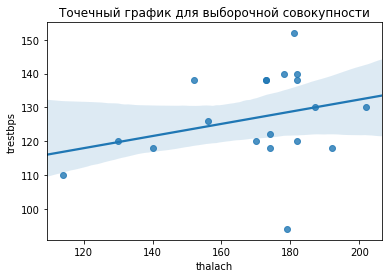

In [34]:
thalach_small = data[data['age']<=40]['thalach']
trestbps_small = data[data['age']<=40]['trestbps']
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.title('Точечный график для выборочной совокупности')
plt.show()

В генеральной совокупности можно увидеть, что этой зависимости нет.

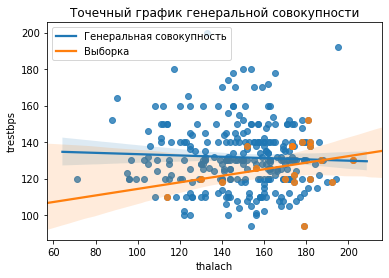

In [35]:
thalach = data['thalach']
trestbps = data['trestbps']
sns.regplot(x= thalach, y=trestbps,data=data, fit_reg=True)
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график генеральной совокупности')
plt.show()

# Тесты на нормальность

**Тест Шапиро-Вилка** проверяет, имеет ли выборка данных распределение Гаусса: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

*  Гипотеза H0 - образец имеет нормальное гауссово распределение
*  гипотеза H1 - образец не имеет нормальное распределение

In [36]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data['thalach'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.976, p=0.000
Probably not Gaussian


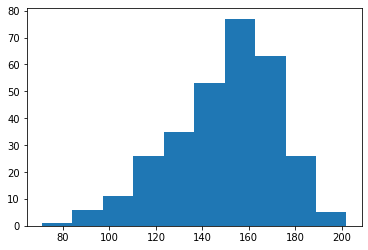

In [37]:
plt.hist(data['thalach'])
plt.show()

Действительно, непохоже на нормальное.

# P-value или статистическая значимость

P-значение, или значение вероятности, это статистическая величина, выраженная числом от 0 до 1, которая используется для проверки гипотезы. В клинических испытаниях данная величина применяется для определения, является ли полученный в клинических испытаниях результат случайным.

До начала сбора данных необходимо определить уровень значимости, который обычно равен 5 % (или 0,05), хотя в зависимости от исследования может быть выбран и другой показатель.

**Статистически значимым** (и позволяющим отвергнуть нулевую гипотезу)при этом считается результат, р-значение которого равно уровню значимости или меньше его. Это, как правило, обозначается следующим образом: p ≤ 0,05.

 При **небольшом p-значении** маловероятна случайность результатов, что дает основание **отвергнуть нулевую гипотезу**. При **большом p-значении** наблюдаемая разница может быть результатом случайности, и **предположение о нулевой гипотезе не может быть отвергнуто**.

# Тест д'Агостино на K ^ 2

Проверяет, является ли выборка нормальной. 

* гипотеза H0 - выборка является нормальной
* гипотеза H1 - выборка не является нормальной

In [38]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest( data['trestbps'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=28.568, p=0.000
Probably not Gaussian


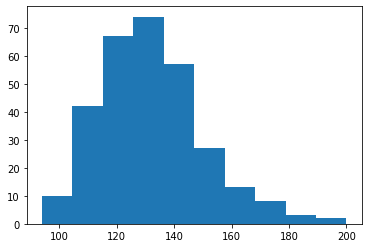

In [39]:
plt.hist( data['trestbps'])
plt.show()

Действительно, непохоже на нормальное.

# Тест Андерсона-Дарлинга

Проверяет, является ли выборка нормальной. 

* гипотеза H0 - выборка является нормальной
* гипотеза H1 - выборка не является нормальной

In [40]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(data['chol'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.726
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


# Корреляционные тесты

В этом разделе перечислены статистические тесты, которые вы можете использовать, чтобы проверить, связаны ли две выборки.

Коэффициент корреляции Пирсона - рассмотрен в предыдущих лекциях

# Ранговая корреляция Спирмена

Проверяет, имеют ли два образца монотонные отношения.

*  H0: два образца независимы
*  H1: существует зависимость между образцами.

In [41]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(data['chol'], data['thalach'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.047, p=0.417
Probably independent


# Ранговая корреляция Кендалла

In [42]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat, p = kendalltau(data['trestbps'], data['chol'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.086, p=0.029
Probably dependent


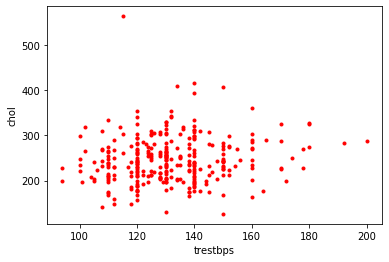

In [43]:
plt.plot(data['trestbps'], data['chol'], 'r.')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

#  Тест хи-квадрат

Проверяет, являются ли две категориальные переменные связанными или независимыми.

*   H0: два образца независимы.
*   H1: существует зависимость между образцами.

In [44]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = data[data['cp']!=0]
table = data[data['thal']!=0]

stat, p, dof, expected = chi2_contingency(table[['cp', 'thal']])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=255.929, p=0.969
Probably independent


# Тесты на проверку стационарность временного ряда

В зависимости от наличия основной тенденции выделяют стационарные ряды, в которых среднее значение и дисперсия постоянны, и нестационарные, содержащие основную тенденцию развития - https://ru.wikipedia.org/wiki/Временной_ряд.

# Augmented Dickey-Fuller Unit Root Test

 (данные упорядочены)

*   Гипотеза H0 - временной ряд нестационарный
*   Гипотеза H1 - временной ряд стационарный

In [45]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
time_series_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(time_series_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


 Стационарн в.р. – отражение некоторого случайного процесса, сам процесс – в равновесии относительно некоего постоянного среднего уровня, его характеристики не зависят от момента времени. Стационарный процесс свободен от периодичности. В анализе временных рядов стационарные ряды имеют постоянные по времени среднее, дисперсию и автокорреляции (т.е. сезонные зависимости удаляются с помощью разностей).

# Kwiatkowski-Phillips-Schmidt-Shin

(данные упорядочены)

*    Гипотеза H0 - временной ряд нестационарный
*    Гипотеза H1 - временной ряд стационарный

In [46]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
time_series_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(time_series_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


/home/orange/venv/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


# **AB - тестирование**

# Проверка гипотезы t-критерия Стьюдента

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза о том, что выборочные средние значения равны:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная о том, что выборочные средние не равны:

$$
H_1: \mu_x \ne \mu_y.
$$

 Тест измеряет насколько среднеквадратичное значение меняется среди выборок. Если мы получаем высокое p-value, например, выше 0.05 или 0.1, тогда мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. Если p-value меньше, чем 1% (или 5%), то мы отвергаем нулевую гипотезу.

# Одновыборочный t-критерий

T-test используют для определения, насколько среднее исследуемой выборки статистически отличается от среднего значения генеральной совокупности. Применяется для проверки гипотезы о равенстве математического ожидания некоторому известному значению. Вычисляется по формуле.

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

Где ${\overline X}$ - выборочное среднее, m - среднее совокупности, ${S_{X}}$ - выборочная дисперсия.

Возьмем выборку женщин по параметру "trestbps" или уровень давления в состоянии спокойствия.

Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [62]:
female_bps = data[data['sex']==0]['trestbps']
stats.ttest_1samp(female_bps, data['trestbps'].mean())

Ttest_1sampResult(statistic=0.7405483189915916, pvalue=0.4607937727598822)

*T*-значение 0.71, мы оцениваем p-value.

Видим, что для имеющихся выборочных данных t-критерий составляет 0.7. Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась прилична: p-value = 0.46  (во всяком случае, это больше 5%)

p-value равно 0.46, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и генеральной совокупности в целом. 

Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так.

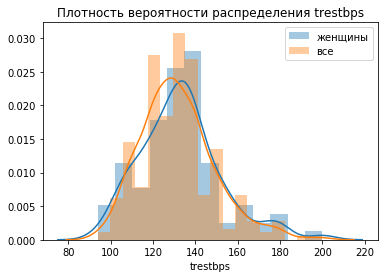

In [48]:
f_trestbps = data[data['sex']==0]['trestbps']
trestbps = data['trestbps']
sns.distplot(f_trestbps)
sns.distplot(trestbps)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'все'])
plt.show()

In [49]:
print('Количество женщин всего: ', len(f_trestbps))

Количество женщин всего:  96


# Двухвыборочный t-критерий для независимых выборок

t-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся.

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

Сравним давление женщин и мужчин.

In [70]:
female_bps = data[data['sex']==0]['trestbps']

male_bps = data[data['sex']==1]['trestbps']

print(stats.ttest_ind(female_bps, male_bps))

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)


p-value равно 0.32, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и мужчин в целом.

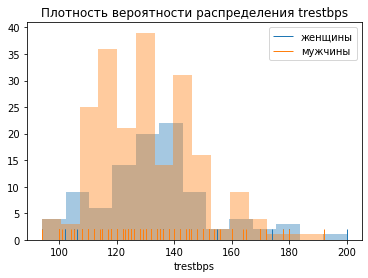

In [67]:
sns.distplot(female_bps, kde=False, rug=True)
sns.distplot(male_bps, kde=False, rug=True)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'мужчины'])
plt.show()

Сравним показатели давления больных и здоровых людей

In [68]:
healthy_bps = data[data['target']==0]['trestbps']

ill_bps = data[data['target']==1]['trestbps']

stats.ttest_ind(healthy_bps, ill_bps)

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

t-value равно 2,5 и p-value меньше 0.05, значит, группы статистически отличаются (понятно почему - у сердечников другие показатели давления)

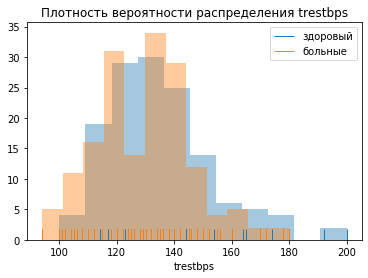

In [69]:
sns.distplot(healthy_bps, kde=False, rug=True)
sns.distplot(ill_bps, kde=False, rug=True)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['здоровый', 'больные'])
plt.show()

Сравним две группы людей (больных и здоровых) по показателям oldpeak (тест, который указывает на высокую вероятность заболевания коронарной артерии, - это тест, в котором наблюдается значительная депрессия ST при низкой частоте работы, связанная с типичной стенообразной болью и снижением артериального давления). Так как здоровые показатели очевидно отличаются от больных, посмотрим статистические показатели.

In [54]:
healthy_oldpeak = data[data['target']==0]['oldpeak']

ill_oldpeak = data[data['target']==1]['oldpeak']

stats.ttest_ind(healthy_oldpeak, ill_oldpeak)

Ttest_indResult(statistic=8.279579663866224, pvalue=4.085346391354538e-15)

Высокий показатель t-value=8.2 и низкий показатель p-value=0 говорит о том, что группы статистически значимы.

# Парный t-тест

Как пример AB-тестирования. Если в предыдущих примерах выборки не зависели между собой, то в парном t-тесте выборка одна и та же, но разные условия тестирования. Вычисляется по формуле $$t=\frac{\overline{d}}{\frac{s}{\sqrt{n}}}$$ где ${\overline{d}}$ - среднее отличие между элементами.

Допустим, есть показатели того, как долго спят пациенты до приема таблеток и после приема таблеток. Нужно оценить похожесть выборок. 

In [55]:
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

stats.ttest_rel(control, treatment)

Ttest_relResult(statistic=-3.6244859951782136, pvalue=0.0055329408161001415)

t-значение -3.624, p-value 0.0055, что меньше чем 0.05 or 0.01, поэтому мы отвергаем нулевую гипотезу и мы можем сказать, что есть статистически значимая разница между тем, как спят пациенты до приема таблеток и после.

# Множественный тест (ANOVA)

Если мы хотим оценить не две группы, а три и более, нужно использовать множественное тестирование. 

Возьмем таблицу 3 группы из колонки restecg (resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)). Сравним их на наличие болезней

In [56]:
restecg_0 = data[data['restecg']==0]['target']

restecg_1 = data[data['restecg']==1]['target']

restecg_2 = data[data['restecg']==2]['target']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=5.131680093569876, pvalue=0.0064359766834508085)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным типом показателей ЭКГ.

# Критерий Манна-Уитни

Если данные не распределены нормально, нужен критерий Манна-Уитни, также известный как Критерий Уилкоксона. Данные представляют финансовые результаты двух разных интернет-магазинов схожей тематики.

In [57]:
a = [742,148,423,424,122,432,-1,232,243,332,213]
b = [-1,3,4,2,1,3,2,4,1,2]
print (stats.ttest_ind(a,b))

Ttest_indResult(statistic=4.683215290130369, pvalue=0.00016194333739811412)


In [58]:
u, p_value = stats.mannwhitneyu(a, b)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0007438622219910575


Критерий Манна-Уитни дает больше информации о различии выборок.

# Критерий Фишера

Допустим, мы посчитали количество китов и акул в Атлантическом и Индийском океанах. В Атлантическом мы нашли 8 китов и 1 акулу, в Индийском океане 2 кита и 5 акул. Таблица выглядит как:

|  | Атлантический | Индийский |
| --- | --- | --- |
| киты | 8 | 2 |
| акулы | 1 | 5 |


Мы используем эту таблицу чтобы найти p-value

In [59]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])
pvalue

0.03496503496503495

P-value примерно равно 3.5%. Обычно пороговый уровень значимости примерно 5% - если мы используем данный порог, то можно сделать вывод, что рассматриваемая выборка имеет **статистическую значимость** (группы различны): киты предпочитают Атлантический океан, а акулы предпочитают Индийский океан

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев